In [35]:
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd


def generate_spectrogram(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    stft = librosa.stft(audio)
    magnitude = np.abs(stft)
    phase = np.angle(stft)
    return magnitude, phase, sr

def show_spectrogram(magnitude, sr):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.amplitude_to_db(magnitude, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram Display')
    plt.tight_layout()
    plt.show()



In [36]:

audio_path = 'audio/audio.wav'
magnitude, phase,sr = generate_spectrogram(audio_path)


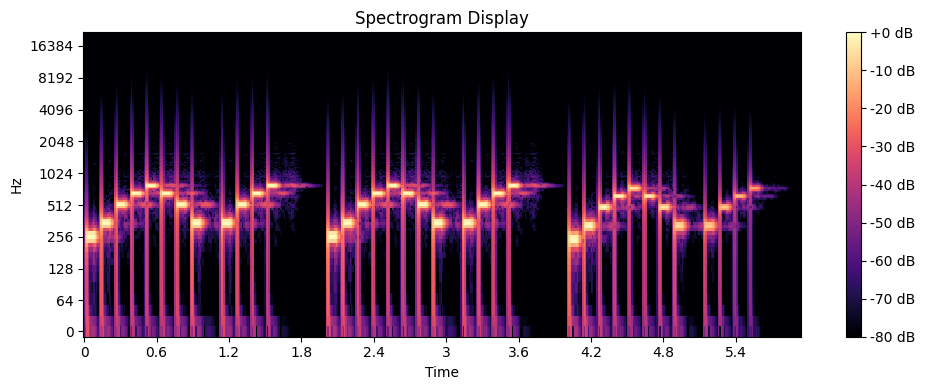

In [37]:
show_spectrogram(magnitude,sr)

In [38]:

def convert_spectrogram_to_audio(magnitude, sr, n_iter=64):
    audio_data = librosa.griffinlim(magnitude, n_iter=n_iter)
    return audio_data

def play_audio_from_spectrogram(magnitude, sr, n_iter=64):
    audio_data = convert_spectrogram_to_audio(magnitude, sr, n_iter)
    return ipd.Audio(data=audio_data, rate=sr)

In [39]:
play_audio_from_spectrogram(magnitude,sr)

In [10]:
magnitude.shape

(1025, 512)

In [25]:
U, S, Vt = np.linalg.svd(magnitude, full_matrices=False)

In [33]:

k = 5
Ss=S.copy()
Ss[k:] = 0
Ss = np.diag(Ss)

# Reconstruct the denoised image
A_denoised = np.dot(U, np.dot(Ss, Vt))

In [34]:
play_audio_from_spectrogram(A_denoised,sr)